# Corny

In [15]:
import sys
import torch
sys.path.append("../density estimation/")
from unet_smp import UNetLightningModule
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms

checkpoint_path = "../checkpoint/unet_smp-custom_density_loss-epoch=295-val_mse_loss=0.00.ckpt"
checkpoint = torch.load(checkpoint_path)
hparams = {
    # Model hyperparameters
    "in_channels": 3,
    "out_channels": 1,
    "decoder_channels": (512, 256, 128, 64, 32),
    "learning_rate": 1e-4,
    # Data hyperparameters
    "batch_size": 16,
    "num_workers": 1,
    # Training hyperparameters
    "max_epochs": 10,
    # Paths
    "train_image_dir": "../datasets/corn_kernel_density/train/original_size_dmx100/sigma-12",
    "train_density_map_dir": "../datasets/corn_kernel_density/train/original_size_dmx100/sigma-12",
    "val_image_dir": "../datasets/corn_kernel_density/val/original_size_dmx100/sigma-12",
    "val_density_map_dir": "../datasets/corn_kernel_density/val/original_size_dmx100/sigma-12",
}

# Create model

model = UNetLightningModule(
    in_channels=hparams["in_channels"],
    out_channels=hparams["out_channels"],
    decoder_channels=hparams["decoder_channels"],
    learning_rate=hparams["learning_rate"],
)
model.load_state_dict(checkpoint["state_dict"])

C:\Users\chuan\AppData\Local\Temp\ipykernel_41948\2332531045.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


<All keys matched successfully>

In [16]:
model

UNetLightningModule(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dSt

In [17]:
# path to input image
input_image_path = "../datasets/corn_kernel_density/train/original_size_dmx100/sigma-12/corn_004.jpg"
image = Image.open(input_image_path)

# Transform the image (adjust according to how your model was trained)
transform = transforms.Compose([
    transforms.Resize((480, 640)),  # Resize to the expected input size of the model
    transforms.ToTensor(),  # Convert to tensor
    # Normalize if your model expects normalized inputs
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

x = transform(image).unsqueeze(0)  # Add a batch dimension

# Ensure the model is in evaluation mode
model.eval()

# Predict with the model (disable gradient computation for inference)
with torch.no_grad():
    y_hat = model(x)

# `y_hat` is the predicted output from the model

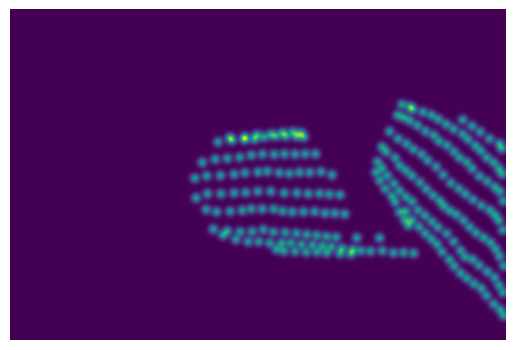

In [6]:
y = np.load("../datasets/corn_kernel_density/train/original_size_dmx100/sigma-12/corn_004_class_0_density.npy")

# Plot the result
plt.figure()
plt.imshow(y)
plt.axis('off') 
plt.show()

mse + relu 15 17
custom + relu 14 16


In [3]:
torch.sum(y_hat)/100 # mse loss

tensor(283.1380)

In [18]:
torch.sum(y_hat)/100 # custom loss function

tensor(220.2413)

In [7]:
np.sum(y)/100

231.0001953125

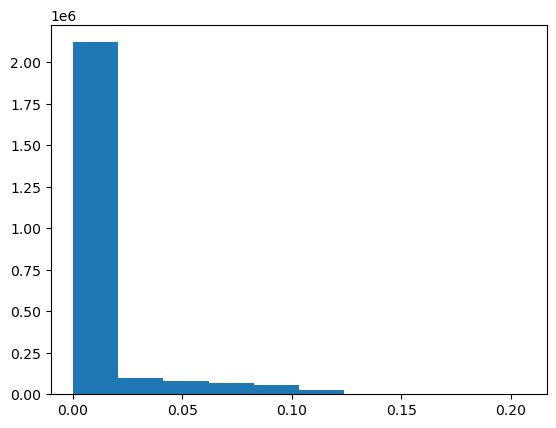

In [13]:
plt.figure()
plt.hist(y.flatten())
plt.show()

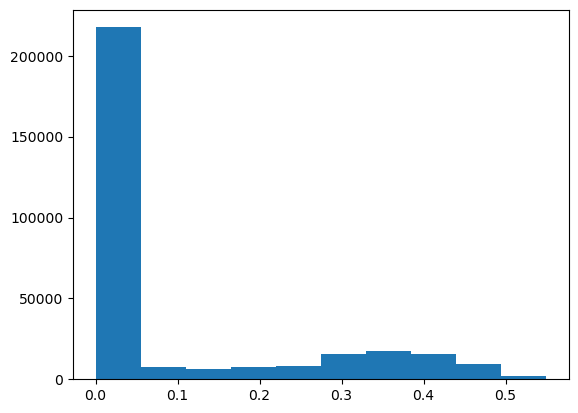

In [8]:
# plot y_hat values in a histogram
plt.figure()
plt.hist(y_hat.flatten())
plt.show()


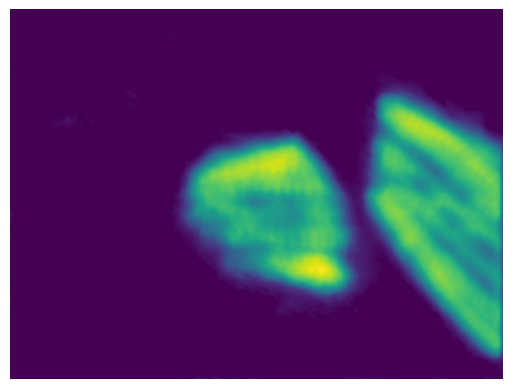

In [19]:
y_hat_np = y_hat.squeeze().numpy()

# Plot the result with custom density map
plt.figure()
plt.imshow(y_hat_np)
plt.axis('off')  # Hide the axis
plt.show()

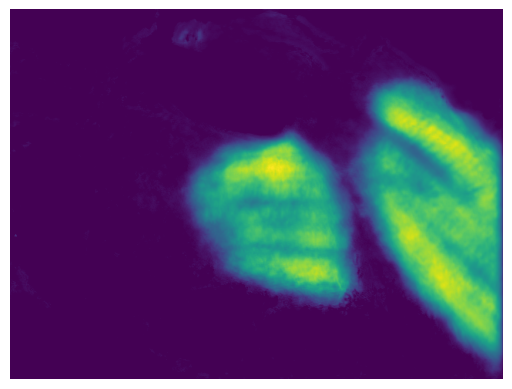

In [9]:
y_hat_np = y_hat.squeeze().numpy()

# Plot the result with custom density map
plt.figure()
plt.imshow(y_hat_np)
plt.axis('off')  # Hide the axis
plt.show()

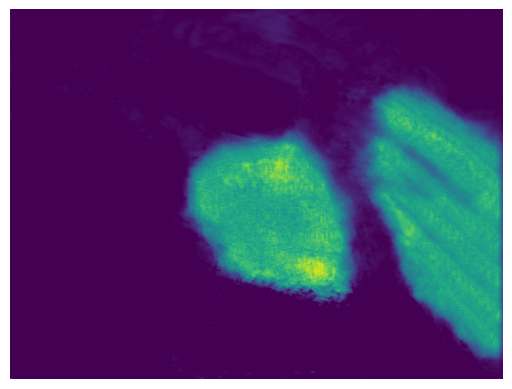

In [15]:
y_hat_np = y_hat.squeeze().numpy()

# Plot the result with custom density map
plt.figure()
plt.imshow(y_hat_np)
plt.axis('off')  # Hide the axis
plt.show()

In [25]:
import segmentation_models_pytorch as smp
model = smp.Unet(
    encoder_name="efficientnet-b1",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)

In [3]:
import json
import os
import glob
import cv2
import h5py
import supervision as sv
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from ultralytics import YOLO
from PIL import Image
from pathlib import Path

c:\Users\chuan\anaconda3\envs\yolov8\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## Inspect dataset

In [25]:
def load_json(filepath):
    """Load a JSON file and return its content."""
    with open(filepath) as file:
        return json.load(file)


# Load datasets and classes json files
data_train = load_json("datasets/corn_coco/corn_kernel_train.json")
data_test = load_json("datasets/corn_coco/corn_kernel_test.json")
classes = load_json("datasets/classes/classes.json")
classes = {item["id"]: item["name"] for item in classes}

# Map unique "category_id" values to their corresponding class names
category_ids = [item["category_id"] for item in data_train["annotations"]]
unique_category_ids = list(set(category_ids))
category_id_to_name = {
    category_id: classes[category_id] for category_id in unique_category_ids
}
category_id_to_name

In [28]:
# Count number of images in train set
image_ids = [item["image_id"] for item in data_train["annotations"]]
count_train = len(set(image_ids))
# Count number of images in test set
image_ids = [item["image_id"] for item in data_test["annotations"]]
count_test = len(set(image_ids))
print(f"Train split: {count_train / (count_train + count_test)}")
print(f"Test split: {count_test / (count_train + count_test)}")

Train split: 0.7967213114754098
Test split: 0.20327868852459016


In [22]:
# Split the train set (0.8) into train (0.6) and validation sets (0.2)
ds = sv.DetectionDataset.from_yolo(
    images_directory_path="datasets/corn_yolo_no_segment/images/train_set",
    annotations_directory_path="datasets/corn_yolo_no_segment/labels/train_set",
    data_yaml_path="datasets/corn_yolo.yaml",
)
train_ds, val_ds = ds.split(split_ratio=0.75, random_state=42, shuffle=True)
train_ds.as_yolo(
    images_directory_path="datasets/corn_yolo_no_segment/images/corn_kernel_train",
    annotations_directory_path="datasets/corn_yolo_no_segment/labels/corn_kernel_train",
)
val_ds.as_yolo(
    images_directory_path="datasets/corn_yolo_no_segment/images/corn_kernel_val",
    annotations_directory_path="datasets/corn_yolo_no_segment/labels/corn_kernel_val",
)

In [23]:
len(train_ds), len(val_ds), count_test

(187, 63, 62)

In [7]:
def create_kernel_only_labels(input_dir, output_dir):
    """
    Filter out all non-kernel labels from the original label files.

    This function copies all '.txt' files in the input directory to
    the output directory while excluding all non-kernel (non-0) labels,
    i.e. lines that do not start with '0'.

    Args:
    - input_dir (str): The directory containing the original label files.
    - output_dir (str): The directory where filtered label files will be saved.
    """

    # Create the output directory if it does not exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over all '.txt' files in the input directory
    for file in glob.glob(input_dir + "*.txt"):
        with open(file, "r") as in_file:
            lines = in_file.readlines()
        with open(output_dir + os.path.basename(file), "w") as out_file:
            for line in lines:
                if line[0] == "0":
                    out_file.write(line)


# Filter out all non-kernel labels from the original label files
in_dirs = [
    "datasets/corn_yolo_no_segment/labels/corn_kernel_test/",
    "datasets/corn_yolo_no_segment/labels/corn_kernel_train/",
    "datasets/corn_yolo_no_segment/labels/corn_kernel_val/",
]
out_dirs = [
    "datasets/corn_kernel_yolo/labels/test/",
    "datasets/corn_kernel_yolo/labels/train/",
    "datasets/corn_kernel_yolo/labels/val/",
]

for in_dir, out_dir in zip(in_dirs, out_dirs):
    create_kernel_only_labels(in_dir, out_dir)


### Create density maps

In [103]:
def density_map_from_annotations(annotations, im_shape, sigma):
    """
    Create a density map from a list of annotations.

    Args:
    - annotations (list): A list of 2D coordinates (x, y) of the centroids.
    - im_shape (tuple): The shape of the image (width, height).
    - sigma (int): The standard deviation of the Gaussian kernel.

    Returns:
    - density_map (np.ndarray): A 2D density map.
    """
    density_map = np.zeros(im_shape)
    for y, x in annotations:
        density_map[int(y), int(x)] = 1
    density_map = gaussian_filter(density_map, sigma)
    density_map[np.where(density_map < 1e-4)] = 0
    # Normalise density map so that the sum equals len(annotations)
    if np.sum(density_map) > 0:
        density_map = len(annotations) * density_map / np.sum(density_map) * 100
    return density_map

In [ ]:
image_path = "datasets/corn_kernel_yolo/images/test/corn_065.jpg"
label_path = "datasets/corn_kernel_yolo/labels/test/corn_065.txt"
output_path = "datasets/corn_kernel_yolo/density/test/corn_065.h5"
sigma = 12
im = Image.open(image_path)
im_shape = (im.height, im.width)
annotations = []
# Extract 2d array of centroid coordinates from label file
with open(label_path, "r") as file:
    for line in file:
        parts = line.strip().split(' ')
        # Extract the y, x coordinates of the centroid
        annotations.append([float(parts[2]) * im.height, float(parts[1]) * im.width])
        # Create density map
dm = density_map_from_annotations(np.array(annotations), im_shape, sigma)
# Plot density map and image side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[1].imshow(dm)
ax[1].set_title("Density map")
ax[0].imshow(im)
ax[0].set_title(f"{Path(image_path).name}")